In [1]:
import seaborn
import first_model
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-1753 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1441894757.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 329874 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.150309s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 2        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors               

In [26]:
athlete_ratings, segment_ratings = first_model.df_to_latent_features(df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 329874 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.141867s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 2        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 1e-08    |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors               

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6bb949490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb6bb4b6750>]], dtype=object)

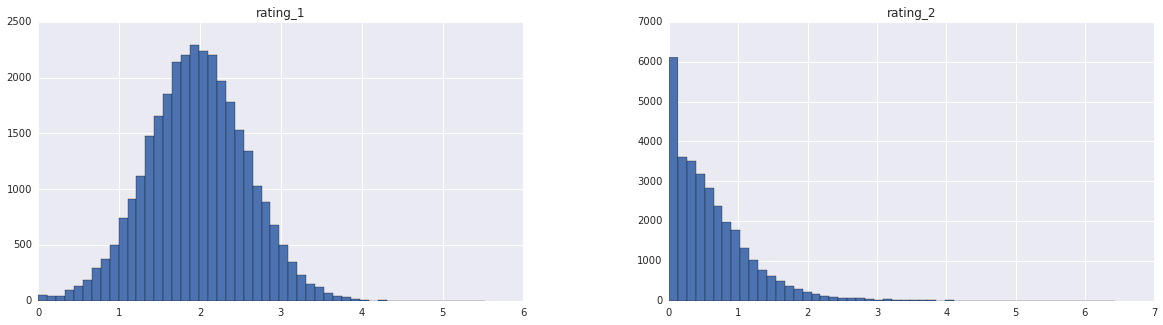

In [27]:
athlete_ratings.hist(bins=50, figsize=(20, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6bb4d5110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb6bb255890>]], dtype=object)

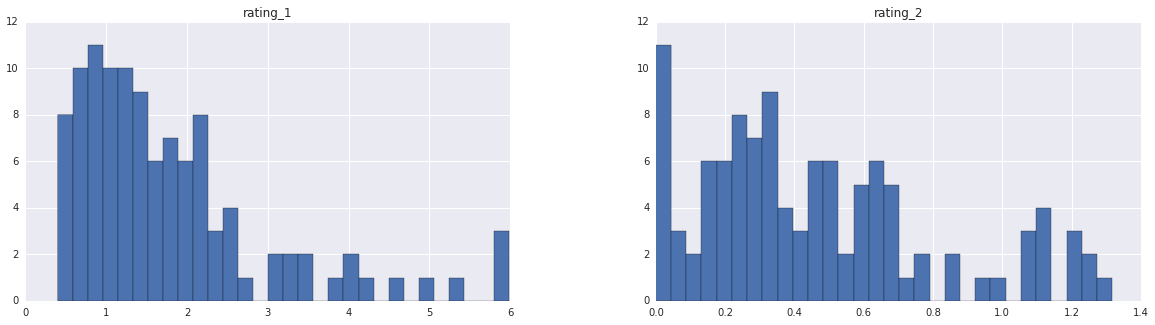

In [28]:
segment_ratings.hist(bins=30, figsize=(20, 5))

In [32]:
segment_columns = ['segment_id', 'seg_average_grade', 'seg_distance', 'seg_elevation_low', 'seg_elevation_high', 'seg_maximum_grade']
df[segment_columns].groupby('segment_id').first()

,seg_average_grade,seg_distance,seg_elevation_low,seg_elevation_high,seg_maximum_grade
segment_id,,,,,
118,8.7,2243.740,70.3,265.9,14.9
125,8.5,3542.400,10.2,312.6,23.3
180,5.5,2244.350,226.5,349.6,14.0
1077,7.3,4972.370,413.0,777.4,20.8
1521,6.8,2159.910,609.6,756.4,18.5
1723,5.6,8622.520,60.2,541.8,10.5
2627,6.8,1332.450,72.2,162.6,10.1
351211,8.8,2802.460,68.4,315.5,22.6
356635,-7.0,1827.930,58.0,190.0,3.4
